In [6]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('reslog.csv')
df

,batch_size,fsc_nomask,fsc_sphericalmask,fsc_loosemask,fsc_tightmask,fsc_noisesub
0,1000,3.613450,3.397822,3.353027,3.176371,3.172318
1,1500,3.527686,3.311609,3.234184,3.087301,3.087129
2,2250,3.420741,3.207343,3.184941,3.040318,3.039041
3,3375,3.359389,3.164706,3.126173,3.041995,3.044875
4,5062,3.215116,3.105036,3.079950,3.030110,3.028857
5,7593,3.207822,3.097767,3.031409,2.946330,2.946980
6,11389,3.139944,3.052802,2.964900,2.907030,2.903185
7,17083,3.107264,3.022396,2.933715,2.857384,2.854736
8,25624,3.046798,2.936369,2.909592,2.857901,2.860223
9,38436,3.034671,2.907397,2.870198,2.824530,2.826296


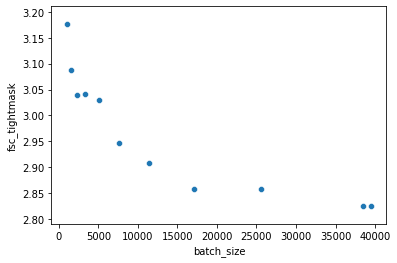

In [8]:
sns.scatterplot(data=df, x='batch_size', y='fsc_tightmask')
plt.show()

In [12]:
df['fsc_nomask_inverse'] = df['fsc_nomask'].apply(lambda x: 1/x)
df['batch_size_log'] = df['batch_size'].apply(lambda x: np.log10(x))
df.head()

,batch_size,fsc_nomask,fsc_sphericalmask,fsc_loosemask,fsc_tightmask,fsc_noisesub,fsc_nomask_inverse,batch_size_log
0,1000,3.613450,3.397822,3.353027,3.176371,3.172318,0.276744,3.000000
1,1500,3.527686,3.311609,3.234184,3.087301,3.087129,0.283472,3.176091
2,2250,3.420741,3.207343,3.184941,3.040318,3.039041,0.292334,3.352183
3,3375,3.359389,3.164706,3.126173,3.041995,3.044875,0.297673,3.528274
4,5062,3.215116,3.105036,3.079950,3.030110,3.028857,0.311031,3.704322


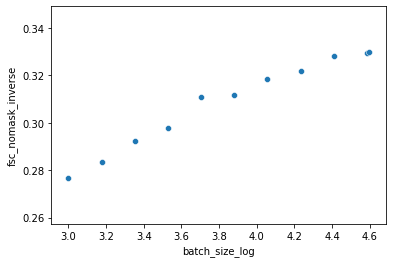

In [13]:
sns.scatterplot(data = df, x = 'batch_size_log', y='fsc_nomask_inverse')

In [14]:
# making new column names
col_names = df.columns
new_names = [f'{name}_inverse' for name in col_names]
new_names

['batch_size_inverse',
 'fsc_nomask_inverse',
 'fsc_sphericalmask_inverse',
 'fsc_loosemask_inverse',
 'fsc_tightmask_inverse',
 'fsc_noisesub_inverse',
 'fsc_nomask_inverse_inverse',
 'batch_size_log_inverse']

In [16]:
for num in range(len(new_names)):
    print(col_names[0])
df

batch_size
batch_size
batch_size
batch_size
batch_size
batch_size
batch_size
batch_size


,batch_size,fsc_nomask,fsc_sphericalmask,fsc_loosemask,fsc_tightmask,fsc_noisesub,fsc_nomask_inverse,batch_size_log,batch_size_inverse,fsc_sphericalmask_inverse,fsc_loosemask_inverse,fsc_tightmask_inverse,fsc_noisesub_inverse,fsc_nomask_inverse_inverse,batch_size_log_inverse
0,1000,3.613450,3.397822,3.353027,3.176371,3.172318,0.001000,3.000000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000
1,1500,3.527686,3.311609,3.234184,3.087301,3.087129,0.000667,3.176091,0.000667,0.000667,0.000667,0.000667,0.000667,0.000667,0.000667
2,2250,3.420741,3.207343,3.184941,3.040318,3.039041,0.000444,3.352183,0.000444,0.000444,0.000444,0.000444,0.000444,0.000444,0.000444
3,3375,3.359389,3.164706,3.126173,3.041995,3.044875,0.000296,3.528274,0.000296,0.000296,0.000296,0.000296,0.000296,0.000296,0.000296
4,5062,3.215116,3.105036,3.079950,3.030110,3.028857,0.000198,3.704322,0.000198,0.000198,0.000198,0.000198,0.000198,0.000198,0.000198
5,7593,3.207822,3.097767,3.031409,2.946330,2.946980,0.000132,3.880413,0.000132,0.000132,0.000132,0.000132,0.000132,0.000132,0.000132
6,11389,3.139944,3.052802,2.964900,2.907030,2.903185,0.000088,4.056486,0.000088,0.000088,0.000088,0.000088,0.000088,0.000088,0.000088
7,17083,3.107264,3.022396,2.933715,2.857384,2.854736,0.000059,4.232564,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059
8,25624,3.046798,2.936369,2.909592,2.857901,2.860223,0.000039,4.408647,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039
9,38436,3.034671,2.907397,2.870198,2.824530,2.826296,0.000026,4.584738,0.000026,0.000026,0.000026,0.000026,0.000026,0.000026,0.000026


In [ ]:
df['batch_log10'] = df['batch_size'].apply(lambda x:np.log10(x))


In [ ]:
for name in new_names:
    sns.scatterplot(data=df, x='batch_log10', y=name)
    plt.xscale('symlog')
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
X = np.array(df['batch_size'])
X = np.log10(X)
X = X.reshape(-1,1)
y = np.array(df['fsc_tightmask_inverse'])
#y = y.reshape(-1,1)

In [ ]:
model.fit(X,y)
y_predict_rgr = model.predict(X)
plt.scatter(X, y)
plt.plot(X, y_predict_rgr, color='orange')
plt.xscale('symlog')
plt.show()

In [ ]:
coef = model.coef_
intercept = model.intercept_
resolution_required = 1/2.5
particles = (resolution_required - intercept) / coef
print(np.round(10**particles,0))